# 다중 회귀

- 여러 개의 특성을 사용한 선형 회귀
- 회귀식
    - 종속변수 = w1x1 + w2x2 +.... + y절편 

<img src = "multiple_regression.png">

# 특성 공학 (feature engineering)

- 기존의 특성을 사용해 새로운 특성을 만들어내는 작업 
- 특성 공학 기법 
    - 차원 축소 (Dimension Reduction)
        - 특성 선정 (feature selection)
            - 특성 랭킹 또는 특성 중요도에 따라 선정
                - 전진 선택법
                - 후진 제거법 
                - 전진 선택법 & 후진 제거법 반복 
            - 분석가의 사전배경지식 이용하거나, 랜덤 선정 및 측정을 반복하는 방법 
        - 특성 추출 (feature extraction)
            - 특성들의 조합으로 새로운 특성 생성
            
    - 스케일링 (Scaling) - preprocessing.StandardScaler
        -  변수의 분포가 편향되어 있을 경우, 변수 간의 관계가 잘 드러나지 않는 경우 범위 변환 
        
    - 변형 (Transform)
        - 기존에 존재하는 변수의 성질을 이용해 다른 변수를 생성하는 기법 
            - 예) 날짜별 데이터에 주말 여부 추가 
    - 비닝 (Binning) - 히스토그램 bins=100 
        - 연속형 변수를 범주형 변수로 변환
            - 예) 33세, 47세 --> 30대, 40대
            
    - 더미 (Dummy) - pd.get_dummies 원핫인코딩 
        - 범주형 변수를 연속형 변수로 변환
        - 기존 특성이나 특성의 조합을 규칙에 따라 수치화하여 추가 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# PolynomialFeatures: 칼럼 뿔려주는 아이
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# Ridge, Lasso: 선형 회귀의 변형된 애들 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt

# 1. 데이터 준비

In [2]:
df = pd.read_csv('FISH.csv')

# 농어 데이터만 사용
df = df.loc[df['Species']=='Perch', ['Weight','Length2','Height','Width']]
df.head()

,Weight,Length2,Height,Width
72,5.9,8.4,2.1120,1.4080
73,32.0,13.7,3.5280,1.9992
74,40.0,15.0,3.8240,2.4320
75,51.5,16.2,4.5924,2.6316
76,70.0,17.4,4.5880,2.9415


# 2. 데이터 분할

In [3]:
# 농어의 무게를 종속변수로 
x = df.drop('Weight', axis=1)
y = df['Weight']

x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.25,
                                                    random_state=4)

len(x_train), len(x_test)

(42, 14)

In [4]:
# PolynomialFeatures 사용 예시
pf = PolynomialFeatures()
pf.fit_transform([[2,3]])

array([[1., 2., 3., 4., 6., 9.]])

In [5]:
# 특성이 어떻게 만들어졌는지 확인
pf.get_feature_names()

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

- include_bias : 절편을 추가해주는 파라미터
    - 사이킷런의 선형회귀모델은 자동으로 절편을 추가해주기 때문에 굳이 절편을 추가할 필요가 없음. 

In [6]:
pf = PolynomialFeatures(include_bias=False)
pf.fit_transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

In [7]:
# 실전 적용 
pf = PolynomialFeatures(include_bias = False)
poly_train = pf.fit_transform(x_train) # 원래 칼럼 3개 
poly_test = pf.transform(x_test)

poly_train.shape

(42, 9)

# 3. 모델 훈련 

- 특성 공학 전후 비교

In [8]:
# 특성공학 전 데이터로 학습한 모델 
lr_org = LinearRegression()
lr_org.fit(x_train, y_train)
lr_org.score(x_test, y_test)
# 결정계수 

0.9600610520458415

In [9]:
lr_org.score(x_train, y_train)

0.9347016860138707

- 과소적합 상태 !! 
    - 훈련 데이터 평가치가 테스트 데이터 평가치보다 낮음. 
- 종속 변수 예측하기에 단서가 모잘랐음. 

In [10]:
lr_poly = LinearRegression()
lr_poly.fit(poly_train, y_train)
lr_poly.score(poly_test, y_test)

0.9710693711540628

In [11]:
lr_poly.score(poly_train, y_train)

0.9901121643178596

- 독립 변수 개수 늘렸더니, 유의미하게 성능이 올랐다. 
- but 꼭 독립변수 많을수록 좋은게 아님 ! 

# 모델 최적화

- 특성을 더 추가
    - degree 매개변수 : 고차항의 최대 차수 지정 

In [12]:
pf = PolynomialFeatures(degree=5, include_bias=False)
poly_train5 = pf.fit_transform(x_train)
poly_test5 = pf.transform(x_test)
poly_train5.shape

(42, 55)

- 전체 데이터 개수보다 칼럼이 더 많아짐. ...

In [13]:
lr_poly5 = LinearRegression()
lr_poly5.fit(poly_train5, y_train)
lr_poly5.score(poly_test5, y_test)

-9.314299057128732

In [14]:
lr_poly5.score(poly_train5, y_train)

0.9999999999999896

- 훈련 데이터에 대해서는 완벽하게 학습
- 테스트 데이터에 대해서는 분산보다 오차가 큼 
    - 데이터의 평균으로 찍는 것보다 성능이 떨어짐.
    - "과대적합" 일어남 !! 

# 규제 (regularization)

- 머신러닝 모델이 훈련 세트를 과도하게 학습하지 못하도록 방지하는 것 
    - 선형 회귀 모델의 경우에는 특성의 기울기 크기를 제한 
- 선형 회귀 모델에 규제를 가하는 방법에 따라 릿지(Ridge) 모델과 라소(Lasso)로 나뉨. 
    - 릿지 모델
        - "계수를 제곱한 값"을 제한 
        - L2 규제 
        - 가중치들은 0에 가까워질 뿐 0이 되지는 않는다
    - 라쏘 모델
        - "계수의 절대값" 제한
        - L1 규제 
        - 필요없는 피처의 가중치들을 0으로 만듦.
        
- 특성이 많은데 그중 일부분만 중요하다면, 라쏘가 좀 더 좋음. 
- 특성의 중요도가 전체적으로 비슷하다면, 릿지가 좀 더 괜찮은 모델을 찾아줄 것

In [15]:
# 일반적으로 선형회귀모델에 규제 적용시 
# 계수 값의 크기가 서로 많이 다르면 제어가 힘듦.
# 따라서 규제 적용 전에 스케일링 수행
ss = StandardScaler()
scaled_train = ss.fit_transform(poly_train5)
scaled_test = ss.transform(poly_test5)

# 1) 릿지 회귀

In [16]:
rid = Ridge()
rid.fit(scaled_train, y_train)
rid.score(scaled_test, y_test)

0.9621128839439514

In [17]:
rid.score(scaled_train, y_train)

0.9897127571191621

- 아까는 과대적합 났는데, 스케일링과 릿지 규제를 거치니
- 꽤나 그럴싸한 결과가 나옴. 

- 천재를 데려다 놓고 자꾸 공부 못하게 방해를 함. 
- 제약 상태에서 역경과 고난을 거치니 최적화된 결과를 내놓을 수 있음. 

# 초매개변수 (hyper-parameter)

- 머신러닝 모델이 학습할 수 없고 사람이 설정해야하는 파라미터
- 사이킷런 모델에서 하이퍼파라미터는 클래스의 매개변수로 표현됨. 

## 릿지 모델 하이퍼파라미터 튜닝

- 데이터에 대해서 가장 잘 학습할 수 있는 상태를 설정하는 것 
- 릿지 모델의 경우, 적어도 다여섯개 정도는 튜닝 가능 

    - alpha: 규제의 강도 
        - alpha 값이 크면
            - 규제 강도가 세짐
            - 계수의 값 줄이고 과소적합 유도
            
        - alpha 값이 작으면 
            - 규제 강도가 약해짐
            - 계수의 값 덜 줄이고 과대적합 가능성이 커짐.

In [18]:
train_hist = []
test_hist = []

alpha_li = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_li:
    # 모델 생성 
    rid = Ridge(alpha=alpha)
    # 훈련
    rid.fit(scaled_train, y_train)
    # 모델 성능 저장
    train_hist.append(rid.score(scaled_train, y_train))
    test_hist.append(rid.score(scaled_test, y_test))

In [19]:
train_hist, test_hist

([0.9937137613763852,
  0.9926093355786132,
  0.9910068150820099,
  0.9897127571191621,
  0.9888993957860818,
  0.9851144530061424],
 [0.9763301355468542,
  0.9693369008542291,
  0.9681616432762313,
  0.9621128839439514,
  0.9502231314730173,
  0.9402905253660088])

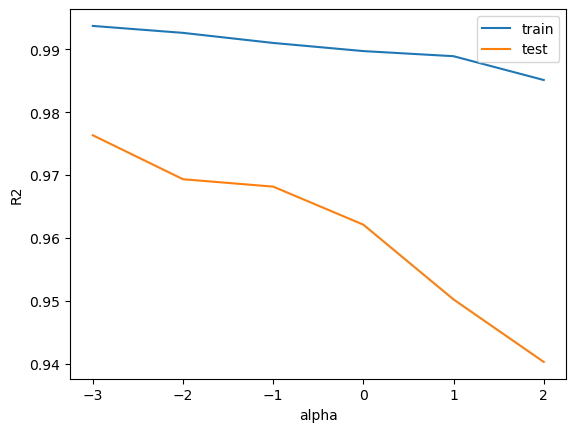

In [20]:
plt.figure()

# alpha 값을 그대로 x에 적용하면 간격이 서로 다르기 때문에
# 로그 함수로 바꿔서 시각화 
plt.plot(np.log10(alpha_li), train_hist)
plt.plot(np.log10(alpha_li), test_hist)
plt.xlabel("alpha")
plt.ylabel("R2")
plt.legend(labels=['train','test'])
plt.show()

 - alpha 가 가장 낮을 때 과소적합이 제일 약하게 나옴. 
 - 규제가 높아질수록 모델에 좋은 영향을 미치지 못한다. 
 - 오히려 규제가 너무 약하면 "과대적합" 이 일어나서 안좋아질수도 있음. 

- alpha가 커질수록 훈련 데이터 점수가 낮아짐. 
    - 과소적합으로 유도되고 있음. 
- 테스트 데이터에 가장 점수가 높은 alpha 값은 0.001 임. 

In [21]:
rid = Ridge(alpha=0.001) # 기본값은 1.0
rid.fit(scaled_train, y_train)
print(rid.score(scaled_train, y_train))
print(rid.score(scaled_test, y_test))

0.9937137613763852
0.9763301355468542


- 함수에 커서 올리고 shift+tab 누르면 함수 설명 창 뜸 !! 

# 2) 라쏘 회귀

In [22]:
las = Lasso() # alpha 기본값 1.0
las.fit(scaled_train, y_train)
print(las.score(scaled_train, y_train))
print(las.score(scaled_test, y_test))

0.9899528568250525
0.9639213215378304


C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.487e+02, tolerance: 5.416e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


## 라쏘 모델 하이퍼파라미터 튜닝 

In [23]:
train_hist = []
test_hist = []

alpha_li = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_li:
    # 모델 생성 
    las = Lasso(alpha=alpha)
    # 훈련
    las.fit(scaled_train, y_train)
    # 모델 성능 저장
    train_hist.append(las.score(scaled_train, y_train))
    test_hist.append(las.score(scaled_test, y_test))
    
train_hist, test_hist

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.203e+04, tolerance: 5.416e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.010e+04, tolerance: 5.416e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fea

([0.9917931409013901,
  0.9917242962502291,
  0.9908812618691495,
  0.9899528568250525,
  0.9889966633161356,
  0.9115063912646608],
 [0.967357701439608,
  0.9675263818878662,
  0.967573623368984,
  0.9639213215378304,
  0.9716261936051647,
  0.9058536227575129])

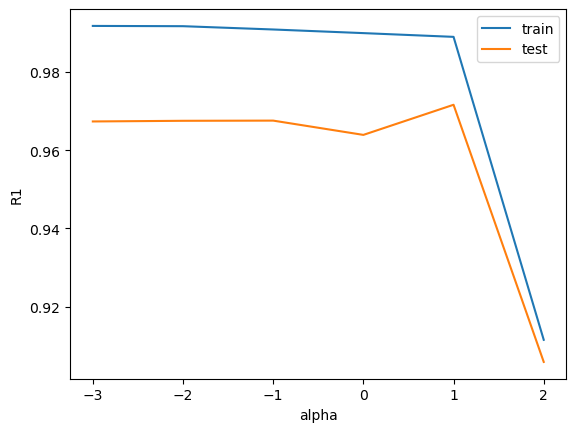

In [24]:
plt.figure()

# alpha 값을 그대로 x에 적용하면 간격이 서로 다르기 때문에
# 로그 함수로 바꿔서 시각화 
plt.plot(np.log10(alpha_li), train_hist)
plt.plot(np.log10(alpha_li), test_hist)
plt.xlabel("alpha")
plt.ylabel("R1")
plt.legend(labels=['train','test'])
plt.show()

- alpha가 10인 지점이 최적점 

In [25]:
las = Lasso(alpha=10)
las.fit(scaled_train, y_train)
print(las.score(scaled_train, y_train))
print(las.score(scaled_test, y_test))

0.9889966633161356
0.9716261936051647


C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.941e+02, tolerance: 5.416e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [26]:
las.coef_

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  52.9021276 ,   0.        ,   0.        ,
        15.45782143,   3.21796662, 102.38312704,  19.75482671,
        32.70994135,   8.99067511,  34.19149153,   0.        ,
         0.        ,   0.        ,  26.83317056,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  16.34285553,   0.        ,   0.        ,
         0.        ,  14.29161344,   0.        ,   0.        ,
         0.        ,   2.47719308,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  20.72312176,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ])

- 라쏘 모델이 판단하기에 "이 칼럼은 아예 안쓰는게 나은데?" 라고 판단하여 0이 나옴... 
- 14개 밖에 쓰지 않음. 
    - 좋은 독립변수를 고를 때 Lasso 모델을 활용하는 방법도 있음. 

In [28]:
print(np.sum(las.coef_==0))

42


- 라쏘 모델은 기울기를 아예 0으로 만드는 경우가 있음.
- 현재는 42개의 독립변수의 기울기를 0으로 만들어 사용하지 않음. 
    - 이런 특징을 이용해 유용한 특성을 선택하는 용도로도 사용 가능함. 